In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy.random as rnd

In [2]:
ADD_NOISE = True
NORMAL_NOISE_MEAN = 0
NORMAL_NOISE_STDEV = "to be defined when needed"

In [3]:
# Define signal parameters
T = 50  # period (seconds)
fs = 1000  # sampling frequency (Hz)
time = np.linspace(0, T, T * fs, endpoint=False)
PLOT_LIMIT = 1000

In [4]:
SCALING_MAX = 1
SCALING_MIN = 0


def my_scaling(x, max_val=SCALING_MAX, min_val=SCALING_MIN):
    # expecting x to be numpy array
    return (x-np.min(x))/(np.max(x)-np.min(x))

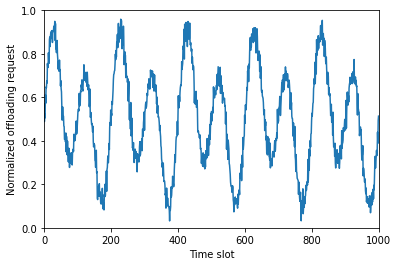

In [5]:
# Generate sine wave 1
frequency_sine1 = 5  # frequency (Hz)
MAGNIFY = 0.5
sine_wave1 = np.sin(2 * np.pi * frequency_sine1 * time) * MAGNIFY

if ADD_NOISE:
    NORMAL_NOISE_STDEV = np.abs(np.max(sine_wave1)-np.min(sine_wave1))*0.05
    for i in range(len(sine_wave1)):
        sine_wave1[i] += rnd.normal(NORMAL_NOISE_MEAN,NORMAL_NOISE_STDEV)

# Generate sine wave 2
frequency_sine2 = 10  # frequency (Hz)
MAGNIFY = 1
sine_wave2 = np.sin(2 * np.pi * frequency_sine2 * time) * MAGNIFY

if ADD_NOISE:
    NORMAL_NOISE_STDEV = np.abs(np.max(sine_wave2)-np.min(sine_wave2))*0.05
    for i in range(len(sine_wave2)):
        sine_wave2[i] += rnd.normal(NORMAL_NOISE_MEAN,NORMAL_NOISE_STDEV)

# combine wave 1 and 2 to make a new one, 3
sine_wave3 = sine_wave1.copy()  # making a DEEP COPY
sine_wave3 += sine_wave2

# make sure all values are non-negative
min_val = np.min(sine_wave3)
if min_val < 0 :
    for i in range(len(sine_wave3)):
            sine_wave3[i] += np.abs(min_val)

#scaling within [predefined_min,predefined_max]
sine_wave3 = my_scaling(sine_wave3)

#plt.plot(sine_wave1)
#plt.plot(sine_wave2)
plt.plot(sine_wave3[:PLOT_LIMIT])
plt.xlabel('Time slot')
plt.ylabel('Normalized offloading request')
plt.ylim([SCALING_MIN,SCALING_MAX])
plt.xlim([0, PLOT_LIMIT])
#plt.show()
plt.savefig('userdata-1-sine.pdf')

# dump to CSV file
myfilename = "userdata-1-sine.csv"
mydelimiter = ","
np.savetxt(myfilename, np.round(sine_wave3,4), delimiter=mydelimiter, fmt='%f')

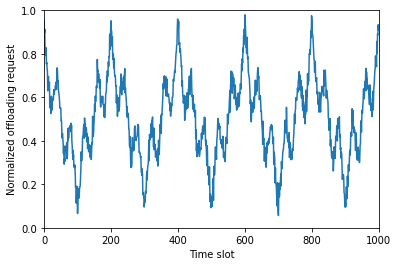

In [6]:
# Generate triangle wave 1
frequency_triangle1 = 1  # frequency (Hz)
MAGNIFY = 2
triangle_wave1 = MAGNIFY * np.abs((10 * frequency_triangle1 * time) % 2 - 1) - 1

if ADD_NOISE:
    NORMAL_NOISE_STDEV = np.abs(np.max(triangle_wave1)-np.min(triangle_wave1))*0.05
    for i in range(len(triangle_wave1)):
        triangle_wave1[i] += rnd.normal(NORMAL_NOISE_MEAN,NORMAL_NOISE_STDEV)
    
# Generate triangle wave 2
frequency_triangle2 = 5  # frequency (Hz)
MAGNIFY = 1
triangle_wave2 = MAGNIFY * np.abs((10 * frequency_triangle2 * time) % 2 - 1) - 1

if ADD_NOISE:
    NORMAL_NOISE_STDEV = np.abs(np.max(triangle_wave2)-np.min(triangle_wave2))*0.05
    for i in range(len(triangle_wave2)):
        triangle_wave2[i] += rnd.normal(NORMAL_NOISE_MEAN,NORMAL_NOISE_STDEV)

triangle_wave3 = triangle_wave1.copy()
triangle_wave3 += triangle_wave2

# make sure all values are non-negative
min_val = np.min(triangle_wave3)
if min_val < 0 :
    for i in range(len(triangle_wave3)):
            triangle_wave3[i] += np.abs(min_val)

#scaling within [predefined_min,predefined_max]
triangle_wave3 = my_scaling(triangle_wave3)

#plt.plot(triangle_wave1)
#plt.plot(triangle_wave2)
plt.plot(triangle_wave3[:PLOT_LIMIT])
plt.xlabel('Time slot')
plt.ylabel('Normalized offloading request')
plt.ylim([SCALING_MIN,SCALING_MAX])
plt.xlim([0, PLOT_LIMIT])
#plt.show()
plt.savefig('userdata-2-triangle.pdf')

# dump to CSV file
myfilename = "userdata-2-triangle.csv"
mydelimiter = ","
np.savetxt(myfilename, np.round(triangle_wave3,4), delimiter=mydelimiter, fmt='%f')

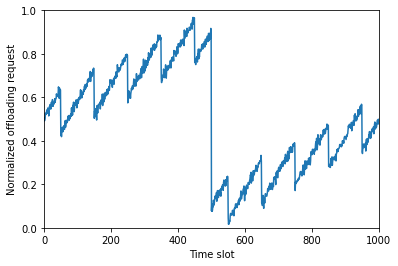

In [7]:
# Generate sawtooth wave 1
frequency_sawtooth1 = 10  # frequency (Hz)
sawtooth_wave1 = 0.5 * (frequency_sawtooth1 * time -
                     np.floor(frequency_sawtooth1 * time + 0.5))

if ADD_NOISE:
    NORMAL_NOISE_STDEV = np.abs(np.max(sawtooth_wave1)-np.min(sawtooth_wave1))*0.05
    for i in range(len(sawtooth_wave1)):
        sawtooth_wave1[i] += rnd.normal(NORMAL_NOISE_MEAN,NORMAL_NOISE_STDEV)

# Generate sawtooth wave 2
frequency_sawtooth2 = 1  # frequency (Hz)
sawtooth_wave2 = 2 * (frequency_sawtooth2 * time -
                     np.floor(frequency_sawtooth2 * time + 0.5))

if ADD_NOISE:
    NORMAL_NOISE_STDEV = np.abs(np.max(sawtooth_wave2)-np.min(sawtooth_wave2))*0.01
    for i in range(len(sawtooth_wave2)):
        sawtooth_wave2[i] += rnd.normal(NORMAL_NOISE_MEAN,NORMAL_NOISE_STDEV)    

sawtooth_wave3 = sawtooth_wave1.copy()
sawtooth_wave3 += sawtooth_wave2

# make sure all values are non-negative
min_val = np.min(sawtooth_wave3)
if min_val < 0 :
    for i in range(len(sawtooth_wave3)):
            sawtooth_wave3[i] += np.abs(min_val)

#scaling within [predefined_min,predefined_max]
sawtooth_wave3 = my_scaling(sawtooth_wave3)

#plt.plot(sawtooth_wave1)
#plt.plot(sawtooth_wave2)
plt.xlabel('Time slot')
plt.ylabel('Normalized offloading request')
plt.ylim([SCALING_MIN,SCALING_MAX])
plt.xlim([0, PLOT_LIMIT])
plt.plot(sawtooth_wave3[:PLOT_LIMIT])
#plt.show()
plt.savefig('userdata-3-sawtooth.pdf')

# dump to CSV file
myfilename = "userdata-3-sawtooth.csv"
mydelimiter = ","
np.savetxt(myfilename, np.round(sawtooth_wave3,4), delimiter=mydelimiter, fmt='%f')

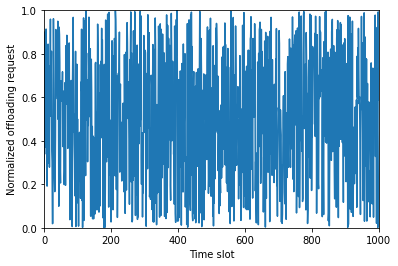

In [8]:
import random

num_of_samples_to_generate = T * fs
random_samples = []
for i in range(num_of_samples_to_generate):
    random_samples.append(random.random())

random_samples = my_scaling(random_samples)

plt.xlabel('Time slot')
plt.ylabel('Normalized offloading request')
plt.ylim([SCALING_MIN,SCALING_MAX])
plt.xlim([0, PLOT_LIMIT])
plt.plot(random_samples[:PLOT_LIMIT])   
#plt.show()
plt.savefig('userdata-4-random.pdf')

# dump to CSV file
myfilename = "userdata-4-random.csv"
mydelimiter = ","
np.savetxt(myfilename, np.round(random_samples,4), delimiter=mydelimiter, fmt='%f')
